<h1 style="color: #1f77b4; font-size: 50px; text-align: center;">
Prévision Météorologique à Paris : Analyse, Modélisation et Étude Comparative
</h1>
<h1 style="font-size: 30px; text-align: center;">
Python pour la Data Science - 2025/2026
</h1>
<h1 style="font-size: 20px; text-align: center;">
Travail élaboré par Jesser ROKH & Khadija AMMAR 
</h1>

## Problématique

> **Dans quelle mesure la confrontation entre l'inférence statistique (SARIMA) et l'apprentissage profond (LSTM) permet-elle d'appréhender la complexité du climat urbain, et quel est le degré de fiabilité de leurs prévisions face aux complexités et limites structurelles des séries temporelles ?**

Ce projet s'articule autour de trois phases principales :

1.  **Acquisition et traitement des données.**
2.  **Analyse exploratoire :** Étude statique et dynamique.
3.  **Modélisation et comparaison :** Mise en œuvre d'approches stochastiques autorégressives face au Deep Learning.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Partie I : Acquisition et traitement des données

In [14]:
%%capture
%run "01_data_collection.ipynb"

Cette première phase constitue le socle fondamental du projet. Elle vise à constituer et fiabiliser le jeu de données qui alimentera l'ensemble du pipeline, de l'analyse exploratoire (statique et dynamique) jusqu'à la modélisation prédictive.

### A – Acquisition des données

L’étape initiale du projet était d'identifier une source de données météorologiques historiques répondant à des critères de fiabilité et de précision rigoureux. La prospection a révélé plusieurs contraintes : de nombreuses bases de données climatologiques sont soit payantes, soit restreintes d'accès, ou présentent une granularité temporelle insuffisante (données journalières) pour une étude fine de la dynamique thermique.

Face à ces limitations, notre choix s'est porté sur l'API **Open-Météo**. Cette source a été retenue pour trois raisons majeures détaillées dans le [Notebook 01 (Data Collection)](./01_data_collection.ipynb) :

1.  **Richesse Multivariée :** Accès simultané à la température et aux variables exogènes critiques (humidité, vent, pression, etc).
2.  **Haute Fréquence :** Une résolution temporelle horaire (pas de temps), indispensable pour capturer le cycle diurne (alternance jour/nuit).
3.  **Qualité Historique :** Une couverture temporelle étendue et continue.

**Protocole de Reproductibilité :**
Dans notre démarche, nous avons figé les bornes temporelles de l'étude dans le notebook d'acquisition. Bien que l'API fournisse des données en temps réel, nous avons défini une date de fin (`end_date`) statique (correspondant à la date d'extraction initiale). Ce gel des données garantit que tous les résultats présentés dans ce rapport (des statistiques descriptives aux performances des modèles) sont strictement reproductibles et ne dépendent pas de la date d'exécution du code.

### B – Traitement des Données

Le traitement des données ne constitue pas une étape isolée, mais un processus continu et transversal, indispensable pour transformer une information brute en connaissances exploitables. Cette phase est cruciale : elle conditionne la qualité des analyses et la convergence des modèles prédictifs. Ce travail de préparation s'est décliné progressivement à travers les trois modules du projet :

* **Fiabilisation du Signal ([Notebook 02 - EDA](./02_eda.ipynb)) :**
    La priorité initiale a été de garantir l'intégrité physique de la série. Nous avons porté une attention particulière au traitement des valeurs manquantes (*missing values*), dont l'origine est souvent liée à des défaillances temporaires de capteurs ou de transmission. Après avoir analysé leur distribution temporelle pour écarter tout biais systématique, nous avons opté pour une **interpolation temporelle linéaire**. Ce choix méthodologique permet de reconstruire la continuité du signal — prérequis indispensable pour les algorithmes récurrents (LSTM) — sans introduire de rupture artificielle dans la dynamique thermique.

* **Structuration Temporelle ([Notebook 03 - Time Series Analysis](./03_time_series_analysis.ipynb)) :**
    Afin de permettre une analyse spectrale et dynamique, nous avons procédé à une indexation rigoureuse. La conversion de l'index en objets `Datetime` a permis de conférer une significativité séquentielle aux données. Cette structuration est fondamentale pour manipuler les fréquences d'échantillonnage et aligner parfaitement les cycles diurnes et saisonniers lors de la décomposition de la série.

* **Préparation à la Modélisation et Feature Engineering ([Notebook 04 - Modelling](./04_modelling.ipynb)) :**
    Cette étape ultime a consisté à adapter mathématiquement les données aux hypothèses spécifiques de chaque famille de modèles :
    * *Pour l'approche Statistique (SARIMA) :* Nous avons procédé à une stationnarisation de la série de température par une double différenciation. Cette transformation vise à stabiliser la moyenne et la variance en éliminant la tendance locale et la saisonnalité journalière.
    * *Pour l'approche Deep Learning :* Après une normalisation stricte des données (*Scaling*), nous avons déployé une stratégie de Feature Engineering avancée pour enrichir le contexte d'apprentissage :
        * **Encodage Temporel :** Projection de l'heure sur un cercle trigonométrique (base sinus/cosinus) pour capturer la cyclicité (continuité entre 23h et 00h).
        * **Enrichissement Historique :** Création de variables retardées (*Lags* : $t-24$, $t-72$, $t-168$) et de fenêtres glissantes (*Rolling Windows*) pour fournir au modèle une mémoire explicite du passé récent.
        * **Variables Binaires Contextuelles :** Création de marqueurs physiques tels que `is_sunny` (dérivé de la durée d’ensoleillement) et `is_day` (dérivé de l'horaire solaire) pour aider le modèle à distinguer les régimes radiatifs diurnes et nocturnes.



## Partie II : Analyse Exploratoire – Étude Statistique et Dynamique

Cette seconde phase du projet se concentre sur l'exploration approfondie du jeu de données exporté. L'objectif est double : comprendre les distributions intrinsèques des variables (approche statique) et décrypter la structure temporelle du signal (approche dynamique) afin d'orienter les choix de modélisation.

### A – Analyse Statique : Distributions et Corrélations

Basé sur le [Notebook 02 – EDA](./02_eda.ipynb), cette première composante de l’analyse exploratoire adopte une lecture statique du jeu de données, en considérant les observations indépendamment de leur ordre temporel. Elle constitue une étape clé pour (i) valider la cohérence physique des données, à travers l’analyse des distributions (asymétries, valeurs extrêmes) (ii) identifier d’éventuelles anomalies dans la base de donnée avec notamment la gestion des valeurs manquantes, et (iii) identifier les relations de dépendance entre variables, en particulier vis-à-vis de la variable cible `temperature_2m` pour finalement guider les décisions de préparation des données en vue de la modélisation.

In [8]:
%%capture
%run "02_eda.ipynb"

#### 1. Cohérence physique et gestion des anomalies
Pour commencer,  l’analyse de la complétude des données montre un taux très limité de valeurs manquantes, concentrées sur deux variables atmosphériques et organisées en plages temporelles continues. Ces valeurs ont été traitées par interpolation temporelle linéaire, afin de préserver la continuité du signal sans introduire de biais structurel, condition essentielle pour les modèles séquentiels.

Par ailleurs, les statistiques descriptives montrent des ordres de grandeur réalistes pour Paris : la température couvre une plage cohérente (min –10,5°C, max 40,9°C, moyenne ≈ 12°C) avec une variablitité physiquement cohérente. 

=== Description : temperature_2m ===
 N total           : 226320
count    226320.000000
mean         12.039332
std           7.105220
min         -10.500000
25%           7.000000
50%          11.900000
75%          17.000000
max          40.900000

 Skewness (asymétrie) : 0.132
 Kurtosis             : -0.285


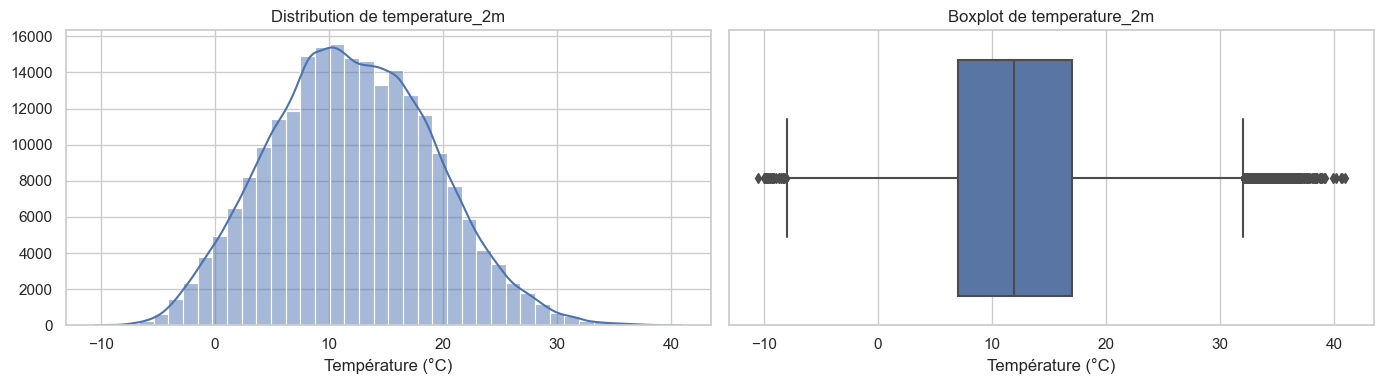

In [ ]:
describe_temperature(df)

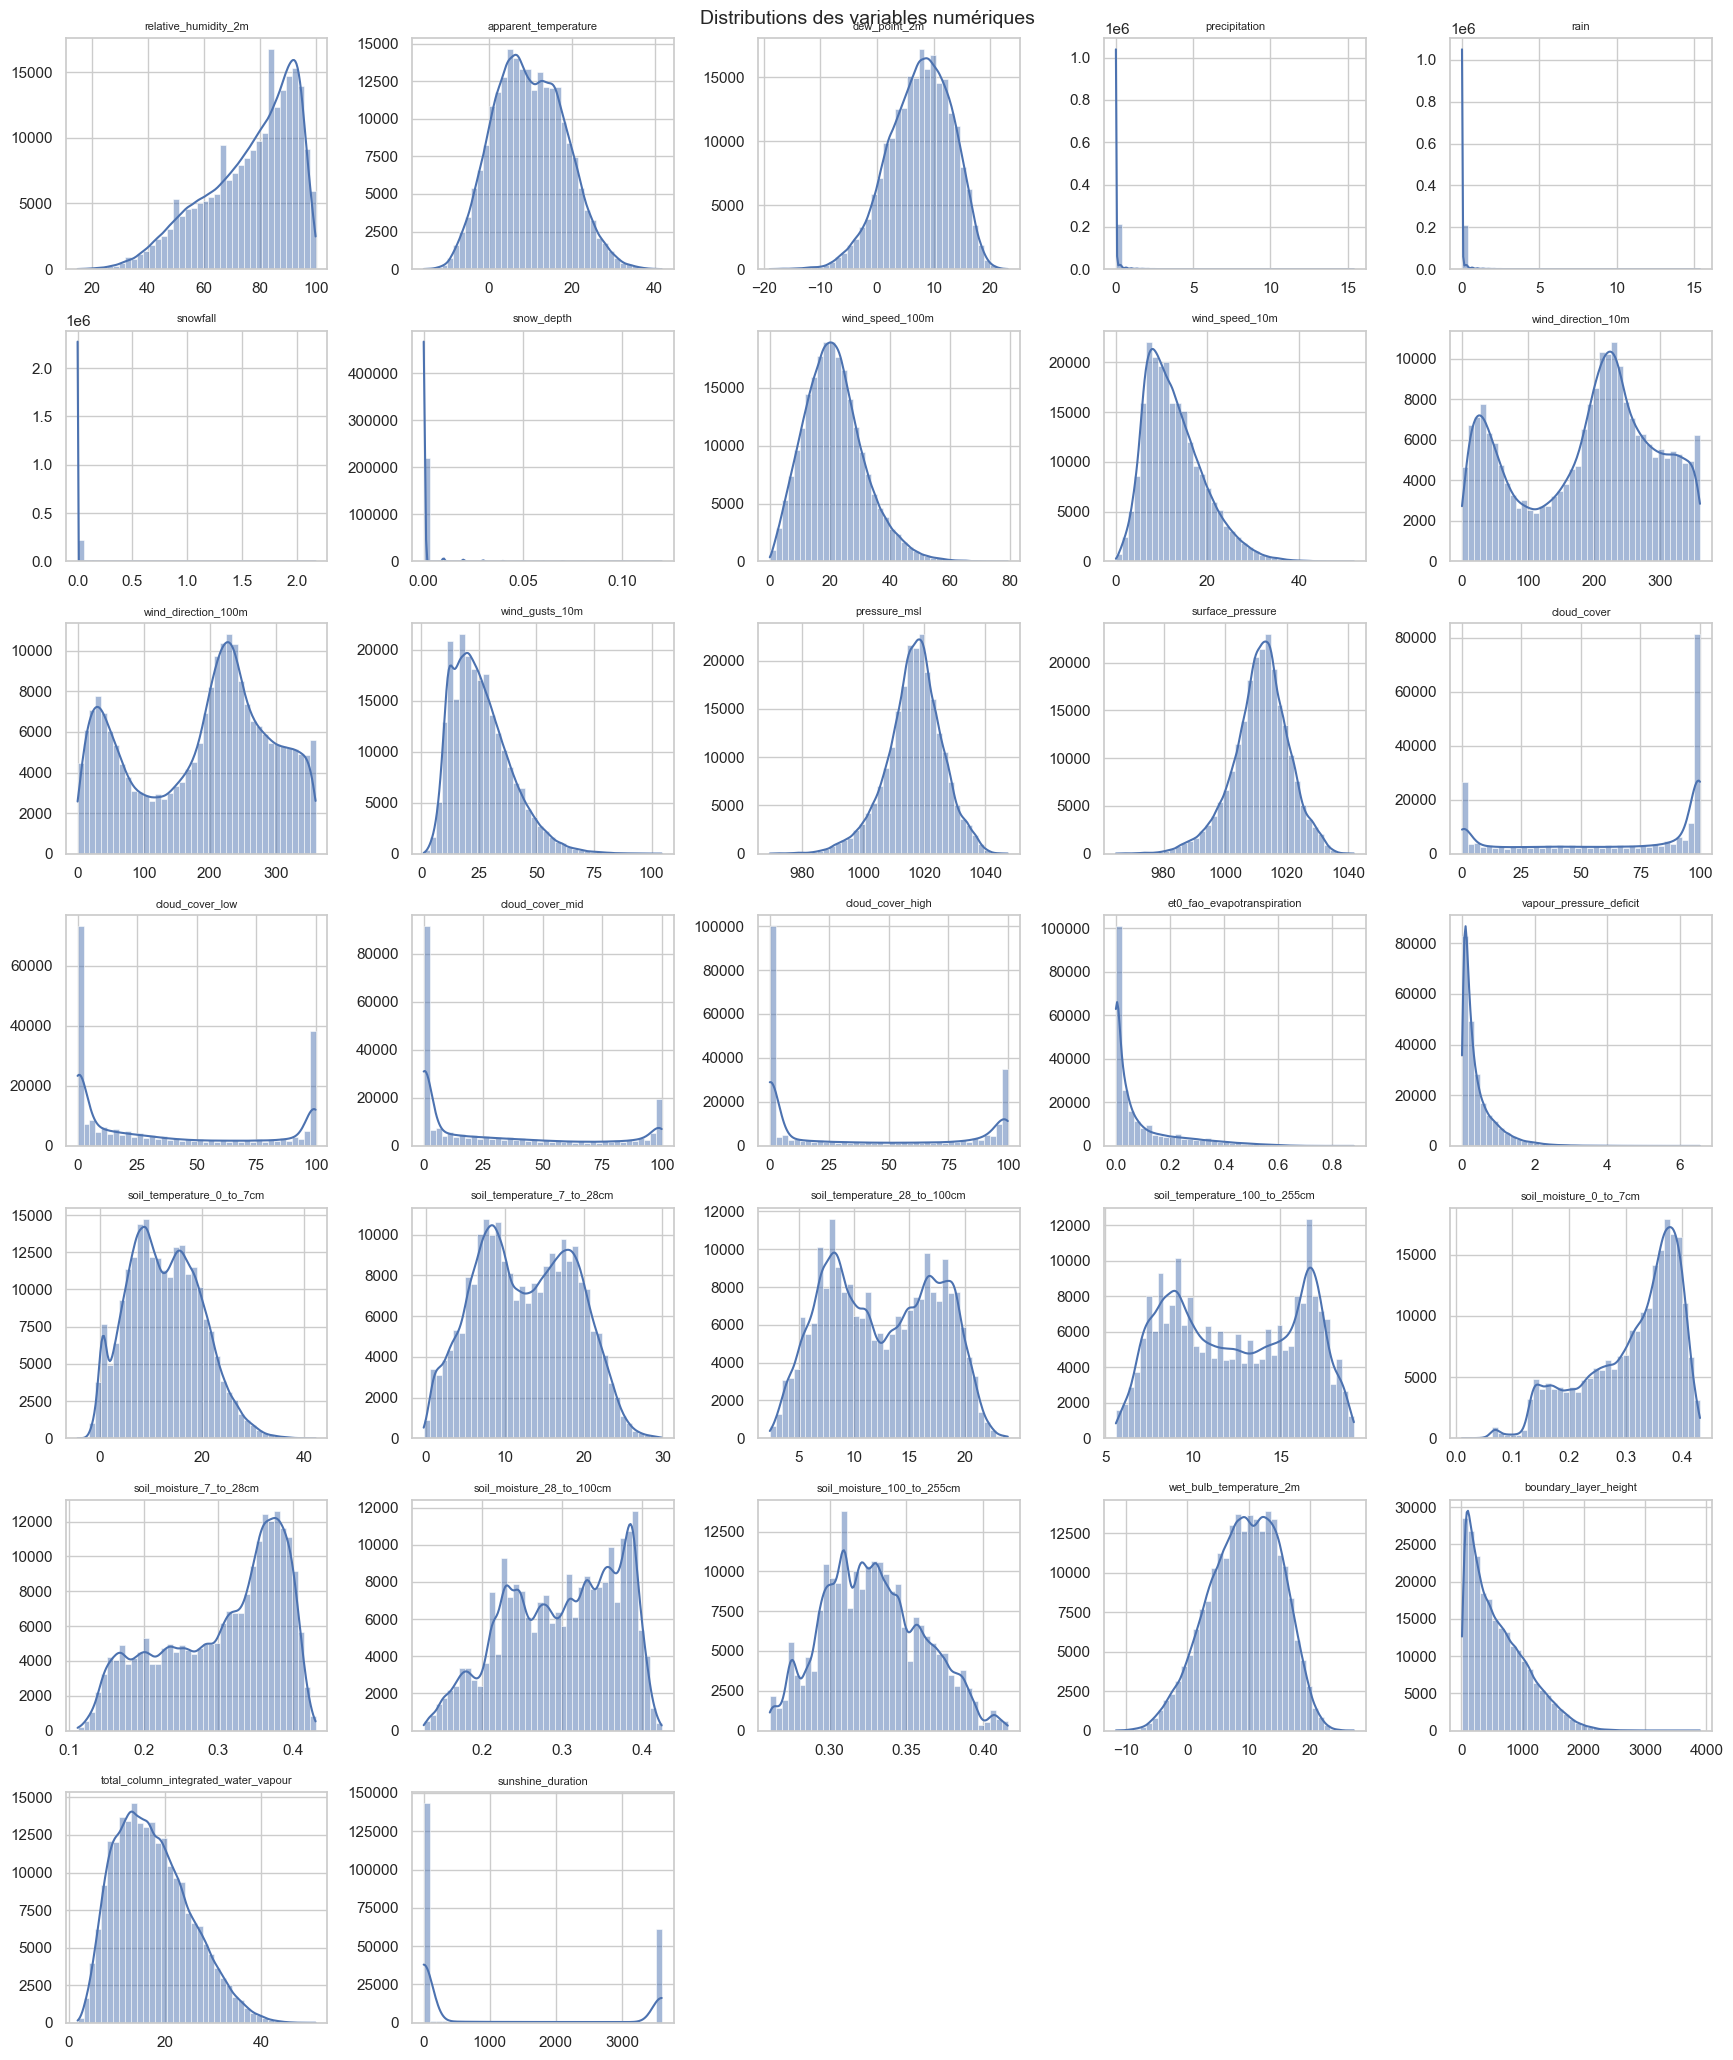

In [10]:
plot_variable_distributions(df, num_cols)

Les variables de précipitations et de neige sont fortement concentrées autour de zéro, reflétant la rareté d’épisodes pluvieux/neigeux à l’échelle horaire, tandis que les variables de vent et de couche limite présentent une dispersion plus élevée, compatible avec des événements météorologiques ponctuels (rafales, instabilité atmosphérique).

L’analyse des distributions met en évidence plusieurs comportements :
  * Variables thermiques/hygrométriques relativement bien comportées (standardisation suffisante).
  * Variables *zero-inflated* (pluie/neige/ensoleillement) nécessitant un traitement spécifique (binarisation).
  * Variables à forte asymétrie positive, une transformation de type $\log(1+x)$ stabilise leur variance.

En parallèle, l’étude des boxplots confirme que les valeurs extrêmes observées sont majoritairement physiquement plausibles (rafales, averses, pics d’ensoleillement). Il ne s’agit donc pas d’erreurs de capteurs mais de phénomènes météorologiques rares. Le choix retenu est de conserver ces extrêmes, tout en contrôlant leur influence via les transformations adaptées.

#### 2. Corrélations, redondances et décisions pour la modélisation
L’étude des corrélations avec `temperature_2m` met en évidence un noyau de variables fortement informatives : `dew_point_2m`, `soil_temperature_0_to_7cm` et, plus largement, les variables thermodynamiques (corrélations positives élevées), tandis que l’humidité relative et l’humidité du sol sont corrélées négativement (cohérente avec les échanges sol–air). La heatmap révèle en outre des blocs de variables fortement colinéaires (famille thermique, humidité du sol multi-couches), indiquant un risque de redondance. 

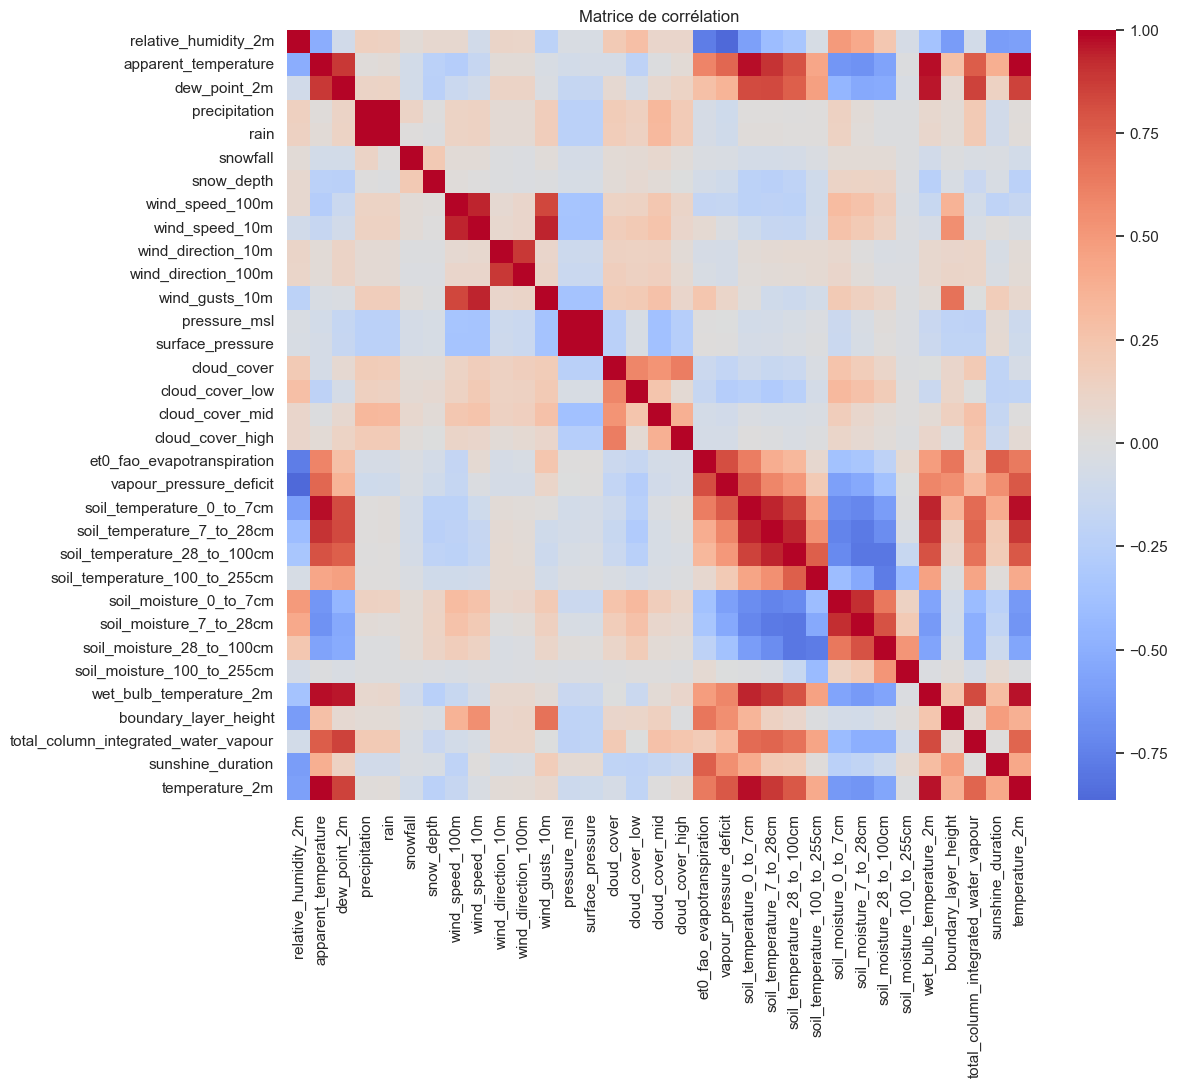

In [11]:
plot_heatmap(corr_matrix)

En conséquence, un sous-ensemble compact et physiquement cohérent a été retenu pour la modélisation afin de limiter la multicolinéarité tout en couvrant les mécanismes clés :
  * `dew_point_2m` (contenu en vapeur d’eau / thermodynamique),
  * `soil_temperature_0_to_7cm` (inertie thermique de surface),
  * `soil_moisture_0_to_7cm` (contrôle hydrique et bilan énergétique),
  * `sunshine_duration` (forçage radiatif).
  * `is_day` (régimes diurne/nocturne).

Ce choix repose sur trois critères : pertinence physique, corrélation statistique et réduction de la redondance.

| Variable | Rôle physique | Corrélation avec `temperature_2m` | Justification du choix |
|--------|---------------|-----------------------------------|-----------------------|
| `dew_point_2m` | Contenu en vapeur d’eau / chaleur latente | Forte (r ≈ 0.9) | Variable thermodynamique directement lié à la quantité de vapeur d’eau dans l’air et à la chaleur latente | 
| `soil_temperature_0_to_7cm` | Inertie thermique du sol | Forte (r ≈ 0.9) | Représente le stockage de chaleur profondeurs redondantes, reflète l’inertie thermique et le rayonnement solaire absorbé | 
| `soil_moisture_0_to_7cm` | Humidité du sol | Modérée négative | Influence le réchauffement du sol (sol sec → plus chaud) | 
| `sunshine_duration` | Rayonnement solaire reçu | Positive nette | Capture la dynamique diurne et le forçage radiatif | 
| `is_day` | Cycle jour / nuit | Relation Non linéaire | Encode le cycle diurne structurant la température | 

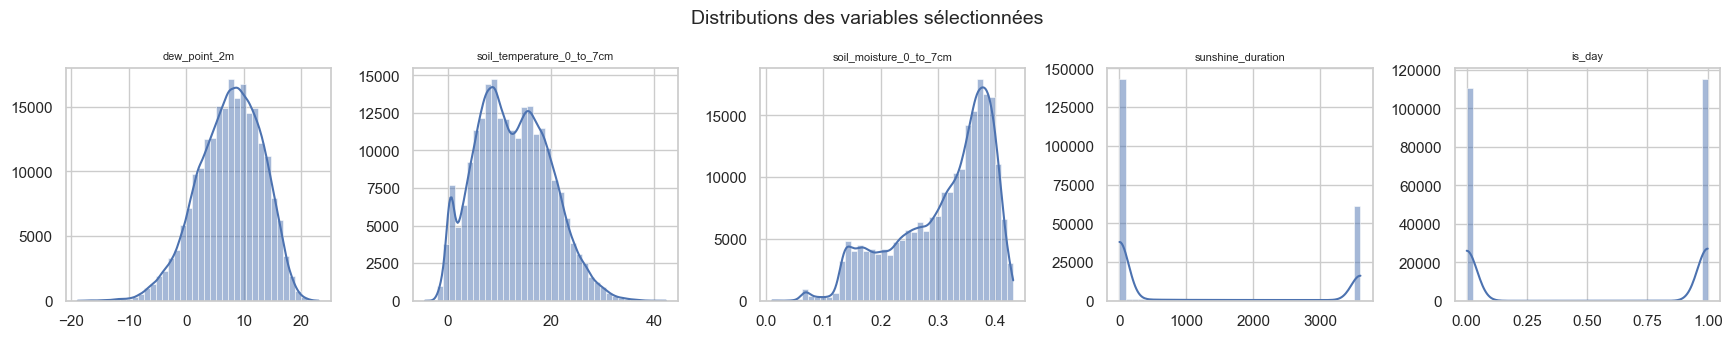

In [12]:
plot_selected_variables_distributions(df_sel, col_selected)

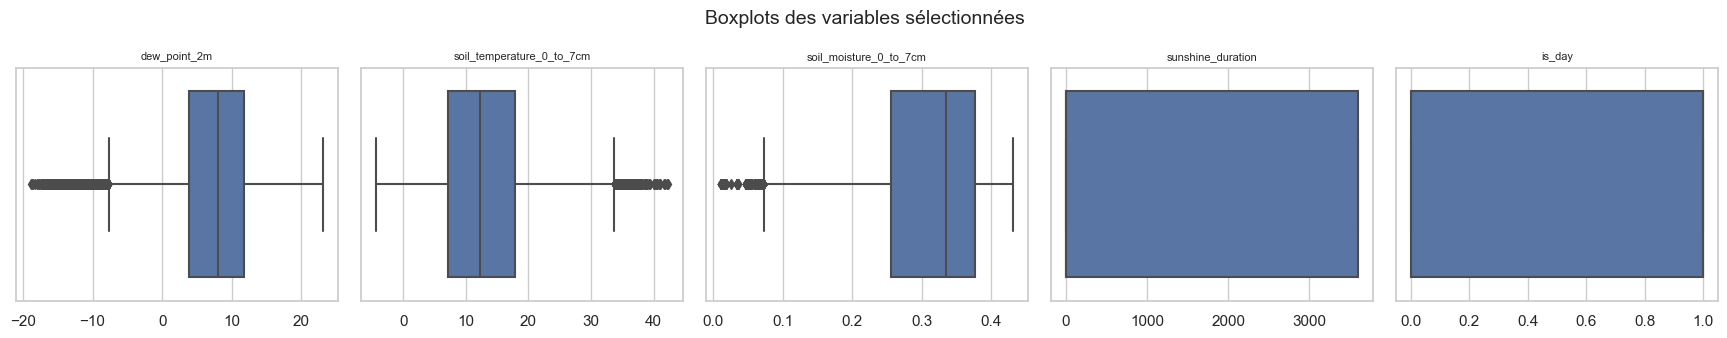

In [13]:
plot_selected_variables_boxplots(df_sel, col_selected)

La décomposition du dataset en deux régimes jour et nuit (selon la variable is_day) a mis en évidence des dynamiques thermiques différentes :

- Le jour, la température est fortement influencée par le rayonnement solaire et une variabilité météorologique rapide.  
- La nuit, elle évolue selon un mécanisme plus simple et plus stable dominé par le refroidissement radiatif.

Dans une perspective de modélisation, la variable `is_sunny`, dérivée de `sunshine_duration`, a été introduite comme un indicateur binaire plus directement interprétable :
- `is_sunny = 1` si `sunshine_duration > 0` (présence d’ensoleillement),
- `is_sunny = 0` sinon.

La variable `is_sunny` capture un effet radiatif direct lié à la présence ou non de rayonnement solaire.
Elle agit comme un raffinement du régime diurne, complémentaire de `is_day` :
  - `is_day` encode la présence potentielle de soleil,
  - `is_sunny` encode la réalité effective de l’ensoleillement.

### Synthèse des caractéristiques et décisions pour la modélisation
| Variable | Propriétés statistiques | Relation avec `temperature_2m` | Décision de modélisation | Justification |
|--------|-------------------------|--------------------------------|--------------------------|---------------|
| `dew_point_2m` | Distribution quasi gaussienne, valeurs extrêmes plausibles | Linéaire, forte corrélation | Standardisation (z-score) | Variable thermodynamique stable, pas de transformation non linéaire nécessaire |
| `soil_temperature_0_to_7cm` | Multimodale (cycles saisonniers), extrêmes cohérents | Linéaire et positive | Standardisation, surveillance de la multicolinéarité pour les modèles linéaires | Capture l’inertie thermique du sol, potentielle redondance avec autres variables thermiques |
| `soil_moisture_0_to_7cm` | Asymétrique, valeurs basses plausibles | Non linéaire, corrélation négative | Standardisation ; transformations dérivées à tester | Information complémentaire sur l’état de surface |
| `sunshine_duration` | Très déséquilibrée (0 / 3600 s) | Positive en journée, nulle la nuit | Conserver pour modèles non linéaires | Représente l’intensité du rayonnement solaire |
| `is_day` | Binaire | Relation non linéaire structurelle | Conserver tel quel | Encode le cycle diurne/nocturne |
| `is_sunny` | Binaire (dérivée de sunshine_duration) | Informative uniquement en journée | Variable dérivée prioritaire | Capture l’effet radiatif sans bruit nocturne, introduit une information non redondante avec `is_day`, en séparant journées ensoleillées (réchauffement radiatif fort) et journées couvertes (réchauffement limité). (Dans le cadre d’un modèle **LSTM multivarié**, `is_sunny` permet d’améliorer la représentation des transitions thermiques diurnes sans introduire de bruit nocturne inutile.)|

L’ensemble de ces transformations a ensuite été appliqué de manière cohérente dans le [Notebook 04 - Modelling](./04_modelling.ipynb).

Les analyses présentées dans le notebook 02 exploitent l’ensemble du dataset, constitué d’observations horodatées (une date/heure par ligne). Toutefois, l’approche adoptée ici est dite statique au sens où les variables ont été étudiées de manière globale sur l’ensemble des observations (distributions,corrélations, effets jour/nuit, effet ensoleillement), sans exploiter explicitement l’ordre temporel des mesures.

Cependant, la température est par nature une variable temporelle, dont l’évolution dépend non seulement des conditions instantanées, mais aussi de son historique récent.

Le Notebook 03 vise donc à explorer la structure temporelle des données afin de mieux comprendre la dynamique d’évolution de la température au cours du temps.

### B – Analyse Dynamique : Caractérisation des Séries Temporelles

Basé sur le [Notebook 03 - Time Series Analysis](./03_time_series_analysis.ipynb), cette section change de paradigme pour intégrer la dimension temporelle, essentielle à la compréhension de la variable cible.

#### 1. Caractérisation des Cycles et de la Volatilité
L'examen macroscopique de l'évolution de la température a immédiatement révélé une structure complexe caractérisée par :
* **Une double saisonnalité imbriquée :**
    * *Cycle Annuel :* Une onde basse fréquence marquée par une montée progressive vers un pic estival (juillet-août) et une décroissance hivernale, typique du climat tempéré.
    * *Cycle Diurne :* En superposant les profils journaliers, nous avons identifié un cycle haute fréquence robuste : minimum thermique matinal (~06h00) et maximum post-méridien (14h00-18h00).
* **Une volatilité haute fréquence :** La présence de fluctuations météorologiques stochastiques quotidiennes et d'événements extrêmes (canicules, vagues de froid) qui se superposent aux cycles réguliers.
* **Une tendance long terme :** Une très faible dérive haussière a été observée, potentiellement liée au réchauffement climatique local, bien que négligeable face à l'amplitude saisonnière.

#### 2. Décomposition et Non-Linéarité
Pour quantifier ces observations, nous avons procédé à une décomposition spectrale de la série (Tendance, Saisonnalité, Résidu). Cette étape a permis d'isoler statistiquement les composantes du signal.
Une observation majeure a émergé de cette analyse : la structure de la température présente une non-linéarité notable. L'interaction entre les deux cycles (annuel et diurne) n'est pas constante ; le profil journalier se déforme selon le mois de l'année (amplitude plus forte en été qu'en hiver). Cette complexité valide la nécessité de modèles capables de capturer des interactions non-linéaires.

#### 3. Diagnostic de Stationnarité
La modélisation statistique exigeant des séries stationnaires, nous avons formalisé notre intuition visuelle par des tests d'hypothèses rigoureux.
Les tests **ADF** (Augmented Dickey-Fuller) et **KPSS** (Kwiatkowski-Phillips-Schmidt-Shin) ont confirmé statistiquement que la série brute n'est pas stationnaire, en raison de la forte saisonnalité et de la variance instable.
**Stratégie de Stationnarisation :** Pour remédier à cela, nous avons opté pour une double différenciation : une différenciation saisonnière (lag 24) pour éliminer le cycle journalier, suivie d'une différenciation simple (lag 1) pour stabiliser la tendance locale.

#### 4. Analyse des Autocorrélations (ACF/PACF)
Une fois la série rendue stationnaire, l'analyse des corrélogrammes (Auto-Correlation Function et Partial ACF) a été menée pour calibrer les futurs modèles.
L'analyse a révélé que les corrélations significatives se concentrent sur le très court terme (24h). Au-delà (semaine, mois), le signal résiduel ne présente que de faibles corrélations linéaires.

**Conclusion pour la modélisation :** Cette analyse dynamique guide notre stratégie hybride : les modèles autorégressifs (SARIMA) seront calibrés pour capturer la dynamique journalière dominante et les dépendances à court terme identifiées par l'ACF, tandis que les variations plus complexes et non-linéaires seront confiées à la capacité d'abstraction des réseaux de neurones.


## Partie III : Modélisation

Cette troisième phase du projet vise à traduire les enseignements issus de l’analyse exploratoire statique et dynamique en modèles prédictifs opérationnels, capables d’anticiper l’évolution de la température horaire à différentes échelles temporelles. L’objectif est de comprendre dans quelle mesure les hypothèses structurelles de chaque famille de modèles influencent leur capacité à reproduire la complexité du climat.
La démarche adoptée repose sur une montée progressive en complexité, depuis des modèles de référence simples jusqu’à des architectures hybrides intégrant explicitement des connaissances physiques et temporelles.

### A - Mise en place d’un cadre de référence : baseline et modèle SARIMA
La première étape de modélisation consiste à établir un *benchmark* minimal à l’aide d’un modèle naïf de persistance saisonnière ($t \to t-24$). Les performances obtenues confirment l’existence d’une forte inertie thermique à l’échelle horaire, rendant cette baseline particulièrement compétitive à très court terme.
Dans un second temps, un modèle **SARIMA** est implémenté afin de capturer formellement la structure auto-corrélée et saisonnière mise en évidence dans le [Notebook 03](./03_time_series_analysis.ipynb). La stationnarisation préalable par double différenciation (simple et saisonnière) permet de satisfaire les hypothèses statistiques du modèle.
Les résultats montrent que SARIMA améliore significativement la baseline lorsqu’il est utilisé en mode *rolling*, grâce à sa capacité à corriger rapidement ses erreurs via le terme de moyenne mobile. En revanche, les prévisions statiques à horizon long révèlent une dérive progressive vers une moyenne saisonnière, traduisant les limites inhérentes d’un modèle linéaire à coefficients constants face à un signal non linéaire.

### B - Deep Learning : apports et limites du LSTM
Afin de dépasser les contraintes structurelles du cadre SARIMA, une première architecture **LSTM univariée** (température comme seule feature) est déployée. Cette approche permet d’exploiter la mémoire interne des réseaux récurrents pour modéliser des dépendances temporelles plus complexes, sans imposer d’hypothèses explicites de linéarité ou de stationnarité. Les résultats montrent une amélioration des performances en mode *rolling* à très court terme, le LSTM surpassant SARIMA grâce à sa capacité à absorber les chocs thermiques locaux. Toutefois, lorsqu’il est utilisé en prévision récursive sur des horizons étendus (plusieurs jours), le modèle tend à produire des trajectoires lissées, convergeant vers une oscillation moyenne, ce qui met en évidence que la température seule ne constitue pas une information suffisante pour anticiper les changements de de régime météorologique à moyen terme.

L’étape suivante consiste à enrichir le modèle LSTM en intégrant un sous-ensemble de variables sélectionnées lors de l’EDA dans le [Notebook 02](./02_eda.ipynb). Cette approche multivariée permet de contextualiser la dynamique thermique et d’améliorer la stabilité des prévisions jusqu’à l’horizon journalier.
Une analyse systématique de l’erreur en fonction de l’horizon ($h = 1$ à $24$ heures) met en évidence une dégradation progressive mais contrôlée des performances, sans rupture brutale. Cette évolution reflète un compromis biais–variance : plus l’horizon s’allonge, plus l’incertitude intrinsèque du système augmente. Néanmoins, au-delà de 48 heures, le modèle tend à nouveau vers un comportement de lissage, révélant une perte d’information contextuelle suffisante pour prédire des événements spécifiques.

### C - Extension au moyen terme : enrichissement des données et architecture hybride CNN-LSTM
Pour étendre la performance à l’échelle de la semaine, une révision plus profonde de la stratégie est opérée. La comparaison des résultats montre que la limite principale ne réside pas dans l’architecture du réseau, mais dans la qualité et la structuration de l’information fournie en entrée.

Un enrichissement systématique des données est alors mis en œuvre, combinant :
* Un encodage cyclique explicite du temps (heures, jours de la semaine).
* Des variables retardées (*lags* à 24h, 72h, 168h).
* Des statistiques glissantes (*rolling means*) fournissant une mémoire explicite du passé.

Ces transformations visent à injecter directement dans le modèle des connaissances physiques et temporelles, transformant un problème d’extrapolation incertaine en un problème d’ajustement autour d’informations déjà structurées.
Sur cette base, une architecture hybride **CNN-LSTM** est introduite. La couche convolutionnelle agit comme un filtre local, extrayant les motifs de courte durée (pics, transitions rapides), tandis que la couche LSTM modélise les dépendances à plus long terme. Cette combinaison permet de stabiliser l’apprentissage et d’améliorer les prévisions à J+3 et J+7.
Les résultats montrent que, contrairement aux approches précédentes, le modèle hybride ne se contente plus de prédire une moyenne saisonnière et il parvient à anticiper certaines variations marquées sans déphasage excessif, signe qu’il exploite efficacement les informations contextuelles enrichies.


## Conclusion

Ce projet a permis de mettre en œuvre une démarche pour l’étude de la température horaire à Paris, depuis l’acquisition et la fiabilisation des données jusqu’à leur analyse exploratoire, puis leur intégration dans des modèles prédictifs.
L’étude statique et dynamique a révélé la richesse et la complexité du signal météorologique urbain, justifiant le recours à des modèles aux hypothèses et capacités complémentaires selon les échelles temporelles considérées.

La phase de modélisation met en évidence que la confrontation SARIMA / LSTM / CNN-LSTM ne conduit pas à une hiérarchie absolue, mais à une vision complémentaire, où chaque approche est optimale sur une plage d’horizons donnée. Ces résultats soulignent l’intérêt de stratégies de prévision adaptatives, capables de mobiliser le modèle le plus pertinent en fonction des objectifs et de l’horizon considéré.
